# Лабораторная работа № 3. Титаник

На основе данных конкурса [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) постройте модель логистической регресси для предсказания выживших пассажиров.

## Задание

1. Постройте классификатор используя доступные числовые признаки.
2. Оцените точность и полноту классификации. Постройте график ROC кривой.
3. Расширьте пространство признаков на основе имени пассажира и оцените качество новой модели.

Вариант с меньшим значением точности на тестовой выборке.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline


ds = pd.read_csv("train.csv")
ds

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df = ds[["Name", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
df = pd.DataFrame(df.dropna())
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,"Braund, Mr. Owen Harris",0,3,1,22.0,1,0,7.2500,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,38.0,1,0,71.2833,C
2,"Heikkinen, Miss. Laina",1,3,0,26.0,0,0,7.9250,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,35.0,1,0,53.1000,S
4,"Allen, Mr. William Henry",0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,"Rice, Mrs. William (Margaret Norton)",0,3,0,39.0,0,5,29.1250,Q
886,"Montvila, Rev. Juozas",0,2,1,27.0,0,0,13.0000,S
887,"Graham, Miss. Margaret Edith",1,1,0,19.0,0,0,30.0000,S
889,"Behr, Mr. Karl Howell",1,1,1,26.0,0,0,30.0000,C


In [3]:
df["Embarked"].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [4]:
#Заменим принадлежность к палубе на бинарный вектор
df['Embarked'] = df['Embarked'].map({ 'S' : np.array([1,0,0]), 'C' : np.array([0,1,0]), 'Q' : np.array([0,0,1])})

In [5]:
df[['S', 'C', 'Q']] = pd.DataFrame(df['Embarked'].values.tolist(), index= df.index)

In [6]:
df["Embarked"].value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1, 0, 0]    554
[0, 1, 0]    130
[0, 0, 1]     28
Name: Embarked, dtype: int64

In [7]:
df

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,S,C,Q
0,"Braund, Mr. Owen Harris",0,3,1,22.0,1,0,7.2500,"[1, 0, 0]",1,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,38.0,1,0,71.2833,"[0, 1, 0]",0,1,0
2,"Heikkinen, Miss. Laina",1,3,0,26.0,0,0,7.9250,"[1, 0, 0]",1,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,35.0,1,0,53.1000,"[1, 0, 0]",1,0,0
4,"Allen, Mr. William Henry",0,3,1,35.0,0,0,8.0500,"[1, 0, 0]",1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,"Rice, Mrs. William (Margaret Norton)",0,3,0,39.0,0,5,29.1250,"[0, 0, 1]",0,0,1
886,"Montvila, Rev. Juozas",0,2,1,27.0,0,0,13.0000,"[1, 0, 0]",1,0,0
887,"Graham, Miss. Margaret Edith",1,1,0,19.0,0,0,30.0000,"[1, 0, 0]",1,0,0
889,"Behr, Mr. Karl Howell",1,1,1,26.0,0,0,30.0000,"[0, 1, 0]",0,1,0


In [8]:
#df['Age'] = (df['Age'].values - df['Age'].mean()) / df['Age'].std()
#df['Fare'] = (df['Fare'].values - df['Fare'].mean()) / df['Fare'].std()
#df['Age'] = (df['Age'].values) / df['Age'].max()
#df['Fare'] = (df['Fare'].values) / df['Fare'].max()


In [9]:
df

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,S,C,Q
0,"Braund, Mr. Owen Harris",0,3,1,22.0,1,0,7.2500,"[1, 0, 0]",1,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,38.0,1,0,71.2833,"[0, 1, 0]",0,1,0
2,"Heikkinen, Miss. Laina",1,3,0,26.0,0,0,7.9250,"[1, 0, 0]",1,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,35.0,1,0,53.1000,"[1, 0, 0]",1,0,0
4,"Allen, Mr. William Henry",0,3,1,35.0,0,0,8.0500,"[1, 0, 0]",1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,"Rice, Mrs. William (Margaret Norton)",0,3,0,39.0,0,5,29.1250,"[0, 0, 1]",0,0,1
886,"Montvila, Rev. Juozas",0,2,1,27.0,0,0,13.0000,"[1, 0, 0]",1,0,0
887,"Graham, Miss. Margaret Edith",1,1,0,19.0,0,0,30.0000,"[1, 0, 0]",1,0,0
889,"Behr, Mr. Karl Howell",1,1,1,26.0,0,0,30.0000,"[0, 1, 0]",0,1,0


In [10]:
x = pd.DataFrame(df[["Name", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "S", "C", "Q"]])
y = pd.DataFrame(df['Survived'])

from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size = 0.3)
#Удалим строковые данные
x_train = X_train.drop(['Name'], axis = 1)
x_valid = X_valid.drop(['Name'], axis = 1)
x_train
y_train = Y_train
y_valid = Y_valid
x_train.sort_values(['Age'])
x_mean = mean(x_train)
x_std = std(x_train)
x_train = (x_train - x_mean) / x_std
x_mean = mean(x_valid)
x_std = std(x_valid)
x_valid = (x_valid - x_mean) / x_std

In [11]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q
293,0.935374,-1.340803,-0.390099,-0.562172,-0.508770,-0.502366,0.523123,-0.456878,-0.209822
764,0.935374,0.745822,-0.943673,-0.562172,-0.508770,-0.521778,0.523123,-0.456878,-0.209822
139,-1.429175,0.745822,-0.390099,-0.562172,-0.508770,0.767998,-1.911598,2.188766,-0.209822
153,0.935374,0.745822,0.751645,-0.562172,1.753441,-0.400340,0.523123,-0.456878,-0.209822
120,-0.246901,0.745822,-0.597689,1.625028,-0.508770,0.665068,0.523123,-0.456878,-0.209822
...,...,...,...,...,...,...,...,...,...
603,0.935374,0.745822,0.993833,-0.562172,-0.508770,-0.516813,0.523123,-0.456878,-0.209822
125,0.935374,0.745822,-1.220459,0.531428,-0.508770,-0.459178,-1.911598,2.188766,-0.209822
762,0.935374,0.745822,-0.666886,-0.562172,-0.508770,-0.531634,-1.911598,2.188766,-0.209822
804,0.935374,0.745822,-0.182510,-0.562172,-0.508770,-0.536225,0.523123,-0.456878,-0.209822


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
x_train = preprocessing.scale(x_train)
x_valid = preprocessing.scale(x_valid)
clf = LogisticRegression().fit(x_train, y_train.values.ravel()) #Обучаем модель
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_predict = clf.predict(x_valid)
print("Precision ", precision_score(y_valid.values, y_predict))
print("Recall ", recall_score(y_valid.values, y_predict))

Precision  0.7560975609756098
Recall  0.6966292134831461


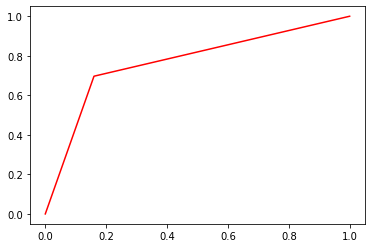

In [13]:
#ROC curve
from sklearn.metrics import roc_curve
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_valid, y_predict)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr_rt_lm, tpr_rt_lm, color = 'red')

# Расширенная модель
<p>Попробуем преобразовать семантическое значеие поля Name в цифровой вид

In [53]:
X_train.sort_values(['Age'])

,Name,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q
803,"Thomas, Master. Assad Alexander",3,1,0.42,0,1,8.5167,0,1,0
755,"Hamalainen, Master. Viljo",2,1,0.67,1,1,14.5000,1,0,0
644,"Baclini, Miss. Eugenie",3,0,0.75,2,1,19.2583,0,1,0
469,"Baclini, Miss. Helene Barbara",3,0,0.75,2,1,19.2583,0,1,0
78,"Caldwell, Master. Alden Gates",2,1,0.83,0,2,29.0000,1,0,0
...,...,...,...,...,...,...,...,...,...,...
116,"Connors, Mr. Patrick",3,1,70.50,0,0,7.7500,0,0,1
493,"Artagaveytia, Mr. Ramon",1,1,71.00,0,0,49.5042,0,1,0
96,"Goldschmidt, Mr. George B",1,1,71.00,0,0,34.6542,0,1,0
851,"Svensson, Mr. Johan",3,1,74.00,0,0,7.7750,1,0,0


In [14]:
X_train['Name'].value_counts()



Beane, Mrs. Edward (Ethel Clarke)    1
Vande Velde, Mr. Johannes Joseph     1
Holverson, Mr. Alexander Oskar       1
Carter, Miss. Lucile Polk            1
Stankovic, Mr. Ivan                  1
                                    ..
Dakic, Mr. Branko                    1
Milling, Mr. Jacob Christian         1
Kent, Mr. Edward Austin              1
Davies, Master. John Morgan Jr       1
Hamalainen, Mrs. William (Anna)      1
Name: Name, Length: 498, dtype: int64

In [15]:
X_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()


Mr          279
Miss        102
Mrs          70
Master       25
Dr            6
Rev           5
Major         2
Mlle          2
Don           1
Capt          1
Mme           1
Sir           1
Jonkheer      1
Countess      1
Ms            1
Name: Name, dtype: int64

In [16]:
X_train['Name'] = X_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).map({'Mr' : np.array([1, 0, 0, 0, 0]),\
                                                                                'Mrs' : np.array([0, 1, 0, 0, 0]),\
                                                                                'Miss' : np.array([0, 0, 1, 0, 0]),\
                                                                                'Lady' : np.array([0, 0, 1, 0, 0]), \
                                                                                'Ms' : np.array([0, 0, 1, 0, 0]), \
                                                                                'Master' : np.array([0, 0, 0, 1, 0])})
X_valid['Name'] = X_valid['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).map({'Mr' : np.array([1, 0, 0, 0, 0]),\
                                                                                'Mrs' : np.array([0, 1, 0, 0, 0]),\
                                                                                'Miss' : np.array([0, 0, 1, 0, 0]),\
                                                                                'Lady' : np.array([0, 0, 1, 0, 0]), \
                                                                                'Ms' : np.array([0, 0, 1, 0, 0]), \
                                                                                'Master' : np.array([0, 0, 0, 1, 0])})
X_train

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Name,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q
293,"[0, 0, 1, 0, 0]",3,0,24.0,0,0,8.8500,1,0,0
764,"[1, 0, 0, 0, 0]",3,1,16.0,0,0,7.7750,1,0,0
139,"[1, 0, 0, 0, 0]",1,1,24.0,0,0,79.2000,0,1,0
153,"[1, 0, 0, 0, 0]",3,1,40.5,0,2,14.5000,1,0,0
120,"[1, 0, 0, 0, 0]",2,1,21.0,2,0,73.5000,1,0,0
...,...,...,...,...,...,...,...,...,...,...
603,"[1, 0, 0, 0, 0]",3,1,44.0,0,0,8.0500,1,0,0
125,"[0, 0, 0, 1, 0]",3,1,12.0,1,0,11.2417,0,1,0
762,"[1, 0, 0, 0, 0]",3,1,20.0,0,0,7.2292,0,1,0
804,"[1, 0, 0, 0, 0]",3,1,27.0,0,0,6.9750,1,0,0


In [17]:
X_train['Name'].value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1, 0, 0, 0, 0]    279
[0, 0, 1, 0, 0]    102
[0, 1, 0, 0, 0]     70
[0, 0, 0, 1, 0]     25
[0, 0, 1, 0, 0]      1
Name: Name, dtype: int64

In [18]:
 X_train.shape[0]

498

In [19]:
for i in range(0, X_train.shape[0]):
    if np.isnan(X_train['Name'].iloc[i]).all():
        X_train['Name'].iloc[i] = np.array([0, 0, 0, 0, 1])
        
for i in range(0, X_valid.shape[0]):
    if np.isnan(X_valid['Name'].iloc[i]).all():
        X_valid['Name'].iloc[i] = np.array([0, 0, 0, 0, 1])    

F:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import

In [20]:
X_train['Name'].value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1, 0, 0, 0, 0]    279
[0, 0, 1, 0, 0]    102
[0, 1, 0, 0, 0]     70
[0, 0, 0, 1, 0]     25
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 1, 0, 0]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
Name: Name, dtype: int64

In [21]:
X_train[['Mr', 'Mrs', 'Miss', 'Master', 'Other']] = pd.DataFrame(X_train['Name'].values.tolist(), index= X_train.index)
X_valid[['Mr', 'Mrs', 'Miss', 'Master', 'Other']] = pd.DataFrame(X_valid['Name'].values.tolist(), index= X_valid.index)
X_train

F:\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Name,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q,Mr,Mrs,Miss,Master,Other
293,"[0, 0, 1, 0, 0]",3,0,24.0,0,0,8.8500,1,0,0,0,0,1,0,0
764,"[1, 0, 0, 0, 0]",3,1,16.0,0,0,7.7750,1,0,0,1,0,0,0,0
139,"[1, 0, 0, 0, 0]",1,1,24.0,0,0,79.2000,0,1,0,1,0,0,0,0
153,"[1, 0, 0, 0, 0]",3,1,40.5,0,2,14.5000,1,0,0,1,0,0,0,0
120,"[1, 0, 0, 0, 0]",2,1,21.0,2,0,73.5000,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,"[1, 0, 0, 0, 0]",3,1,44.0,0,0,8.0500,1,0,0,1,0,0,0,0
125,"[0, 0, 0, 1, 0]",3,1,12.0,1,0,11.2417,0,1,0,0,0,0,1,0
762,"[1, 0, 0, 0, 0]",3,1,20.0,0,0,7.2292,0,1,0,1,0,0,0,0
804,"[1, 0, 0, 0, 0]",3,1,27.0,0,0,6.9750,1,0,0,1,0,0,0,0


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
X_train = pd.DataFrame(X_train.drop(['Name'], axis = 1))
X_valid = pd.DataFrame(X_valid.drop(['Name'], axis = 1))
x_mean = mean(X_train)
x_std = std(X_train)
x_train = (X_train - x_mean) / x_std
x_mean = mean(X_valid)
x_std = std(X_valid)
x_valid = (X_valid - x_mean) / x_std
X_train = preprocessing.scale(X_train)
X_valid = preprocessing.scale(X_valid)
clf_for_more = LogisticRegression().fit(X_train, Y_train.values.ravel())
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
Y_predict = clf_for_more.predict(X_valid)
print("Precision ", precision_score(Y_valid.values, Y_predict))
print("Recall ", recall_score(Y_valid.values, Y_predict))

Precision  0.7931034482758621
Recall  0.7752808988764045


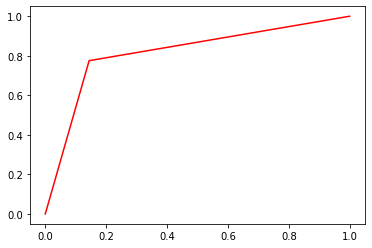

In [23]:
#ROC curve
from sklearn.metrics import roc_curve
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(Y_valid, Y_predict)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr_rt_lm, tpr_rt_lm, color = 'red')

# Вывод
Дополнение признаков уведичили показатели модели